In [1]:
import os   #These two are useful modules
import sys

#here you can import other useful modules, such as numpy, matplotlib, etc..
import numpy as np #Numerical Python
import matplotlib.pyplot as plt

#also import astropy.fits
from astropy.io import fits

In [2]:
# Let's define te directory where you are with the "get current working directory" command...
work_dir = os.getcwd()
print("I am in dir %s" % work_dir)

#We can go up by using the path.dirname
main_dir =os.path.dirname(work_dir)
print("Main directory is %s" % main_dir)

#We can then define the data directory using the os.path.join command
data_dir = os.path.join(main_dir,"data")
print("Data directory is %s" % data_dir)

#..and we can define some output directory with the results
results_dir = os.path.join(main_dir,"results")

#if the directory does not exist, you can create it...
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    print("Directory %s created!" % results_dir)
else:
    print("Results directory is %s" % results_dir)

I am in dir /home/sara/Scrivania/1magistrale/multimessenger/GW/experience-gw-Sara-a-r/code
Main directory is /home/sara/Scrivania/1magistrale/multimessenger/GW/experience-gw-Sara-a-r
Data directory is /home/sara/Scrivania/1magistrale/multimessenger/GW/experience-gw-Sara-a-r/data
Results directory is /home/sara/Scrivania/1magistrale/multimessenger/GW/experience-gw-Sara-a-r/results


In [3]:
#Let's see the data relative to the detection that I have choose (GW150914)
#you will receive a list of files, that you could download in your data dir for future use,
#or just use the fetch command (see below) to use the files in real time 
ev_name = "GW150914"

#interferometer to use
ev_ifoH = "H1"
ev_ifoL = "L1"

from gwosc.datasets import event_gps
from gwosc.locate import get_event_urls

ev_gps = event_gps(ev_name)
event_urls = get_event_urls(ev_name)

print("Ev name: %s,\nEv_gps: %.1f,\nEv_urls: %s\n" % (ev_name,ev_gps,event_urls))

Ev name: GW150914,
Ev_gps: 1126259462.4,
Ev_urls: ['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126257415-4096.hdf5']



In [4]:
#Here we will select a time frame and see how we can have a quick look at the signal and do some basic filtering

from gwpy.timeseries import TimeSeries
from gwpy.segments import DataQualityFlag

# Select a time interval of 60 mins around the event. This is because on GWOSC there is 1 hour data window released around events
dt_win=3600*0.5 
ev_t0_min = ev_gps-dt_win
ev_t0_max = ev_gps+dt_win

print("Get data for %s (%s) GPS: %.2f - %.2f" % (ev_name,ev_ifoH,ev_t0_min,ev_t0_max))
print("Get data for %s (%s) GPS: %.2f - %.2f" % (ev_name,ev_ifoL,ev_t0_min,ev_t0_max))

#fetch the data. Use cache=True to keep the data in the cache memory (to speed things up)
dataH = TimeSeries.fetch_open_data(ev_ifoH,ev_t0_min,ev_t0_max,cache=True)
print('------------------------------------------------------------')
print(dataH)
dataL = TimeSeries.fetch_open_data(ev_ifoL,ev_t0_min,ev_t0_max,cache=True)
print('------------------------------------------------------------')
print(dataL)

#get the segments in a larger time window (just to have a bigger time span to look over)
segmentsH = DataQualityFlag.fetch_open_data(ev_ifoH+"_DATA",ev_t0_min-dt_win,ev_t0_max+dt_win)
print('Done H')
segmentsL = DataQualityFlag.fetch_open_data(ev_ifoL+"_DATA",ev_t0_min-dt_win,ev_t0_max+dt_win)
print("Done L")

Get data for GW150914 (H1) GPS: 1126257662.40 - 1126261262.40
Get data for GW150914 (L1) GPS: 1126257662.40 - 1126261262.40
------------------------------------------------------------
TimeSeries([-6.96658213e-20, -1.08006670e-19, -7.14921967e-20,
            ..., -6.30679159e-20, -5.32200643e-20,
            -7.26332994e-20]
           unit: dimensionless,
           t0: 1126257662.3999023 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)
------------------------------------------------------------
TimeSeries([-1.28274696e-18, -1.29408323e-18, -1.31016529e-18,
            ..., -6.54584201e-19, -6.95868715e-19,
            -7.31839405e-19]
           unit: dimensionless,
           t0: 1126257662.3999023 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)
Done H
Done L


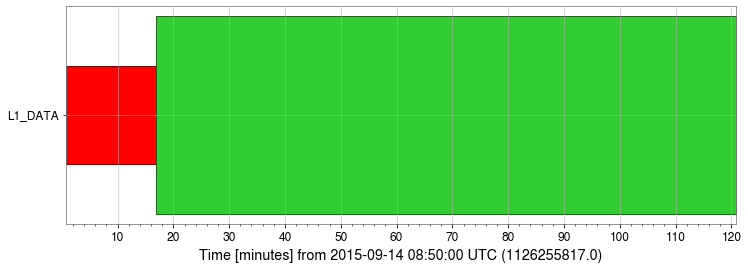

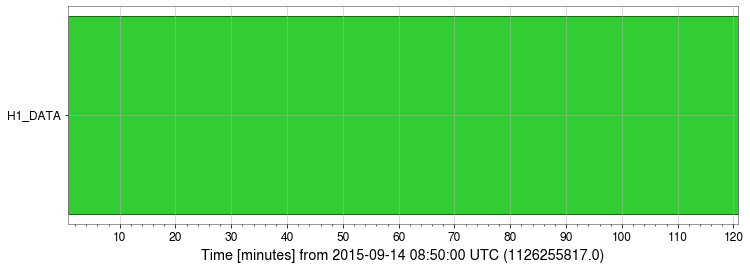

In [5]:
#Plot data quality to see if data are okay. Green is data ok, red is data bad...
plotL = segmentsL.plot()
plotH = segmentsH.plot()

#save figure in results directory
out_name = os.path.join(results_dir,"qualityH.png")
plt.savefig(out_name, dpi = 200)
plt.show()

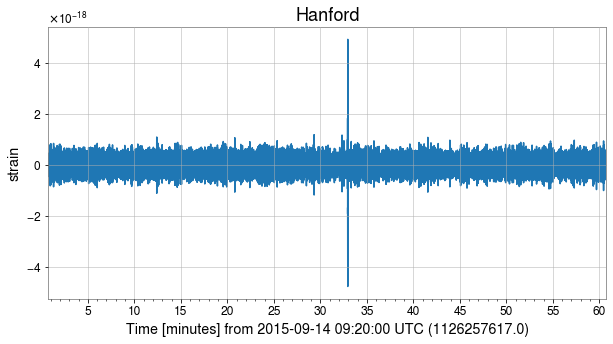

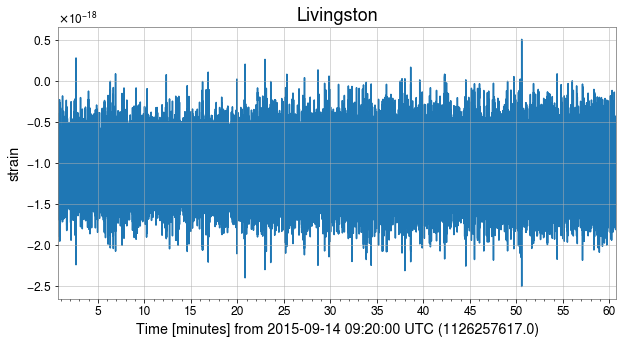

In [6]:
#plot strain (raw data)
from gwpy.plot import Plot

#-------------------------------------------HANFORD--------------------------------------------
plot_dataH=dataH.plot(figsize = (10,5))
#plt.xlim(ev_gps-300,ev_gps+300)
#plt.plot([ev_gps,ev_gps],[-4e-18,4e-18], marker = '.')
plt.ylabel('strain')
plt.title('Hanford', fontsize=18)

#save figure in results directory
out_name = os.path.join(results_dir,"strainH.png")
plt.savefig(out_name, dpi = 200)
plt.show()

#-------------------------------------------LIVINGSTON--------------------------------------------
plot_dataL=dataL.plot(figsize = (10,5))
plt.ylabel('strain')
plt.title('Livingston', fontsize=18)

#save figure in results directory
out_name = os.path.join(results_dir,"strainL.png")
plt.savefig(out_name, dpi = 200)
plt.show()

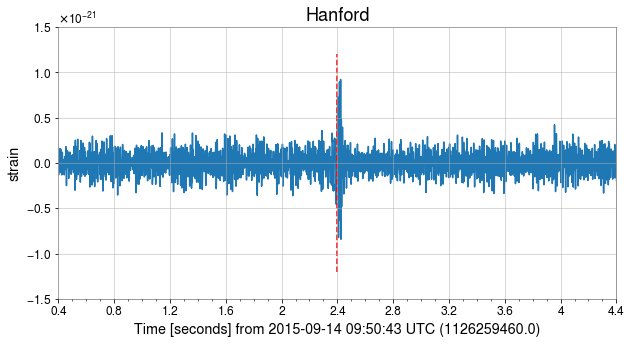

In [8]:
#apply filter on HANFORD

#then a medium frequency filter. Something is visible?
# One can also apply a notch filter in order to remove specific lines (in this case the power line at 60 Hz)
data_filteredH=dataH.bandpass(50,250).notch(60)

plotH = data_filteredH.plot(figsize=(10,5))
axH = plotH.gca()

#zoom around the event. Can we see something now?
dt_win = 2
axH.set_xlim(ev_gps-dt_win,ev_gps+dt_win)  #dt of 2 s
axH.set_ylim(-1.5e-21,1.5e-21)
plt.plot([ev_gps,ev_gps],[-1.2e-21,1.2e-21], marker = '', linestyle = '--', color = 'r')
plt.title('Hanford', fontsize=18)
plt.ylabel('strain')

#save figure in results directory
out_name = os.path.join(results_dir,"filteredH.png")
plt.savefig(out_name, dpi = 200)
plt.show()

plotH.refresh()

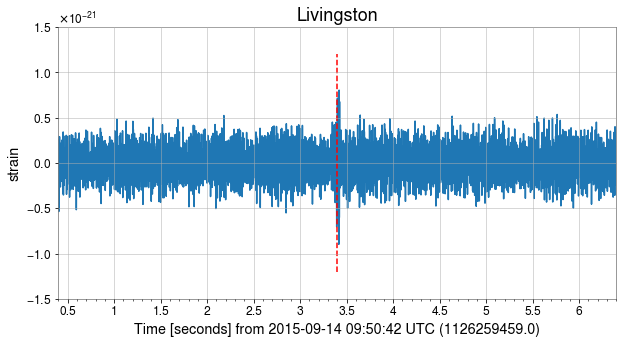

In [9]:
#apply filter on LIVINGSTON

#then a medium frequency filter. Something is visible?
# One can also apply a notch filter in order to remove specific lines (in this case the power line at 60 Hz)
data_filteredL=dataL.bandpass(50,250).notch(60)

plotL = data_filteredL.plot(figsize=(10,5))
axL = plotL.gca()

#zoom around the event. Can we see something now?
dt_win = 3
axL.set_xlim(ev_gps-dt_win,ev_gps+dt_win)  #dt of 2 s
axL.set_ylim(-1.5e-21,1.5e-21)
plt.plot([ev_gps,ev_gps],[-1.2e-21,1.2e-21], marker = '', linestyle = '--', color = 'r')
plt.title('Livingston', fontsize=18)
plt.ylabel('strain')

#save figure in results directory
out_name = os.path.join(results_dir,"filteredL.png")
plt.savefig(out_name, dpi = 200)
plt.show()


plotL.refresh()

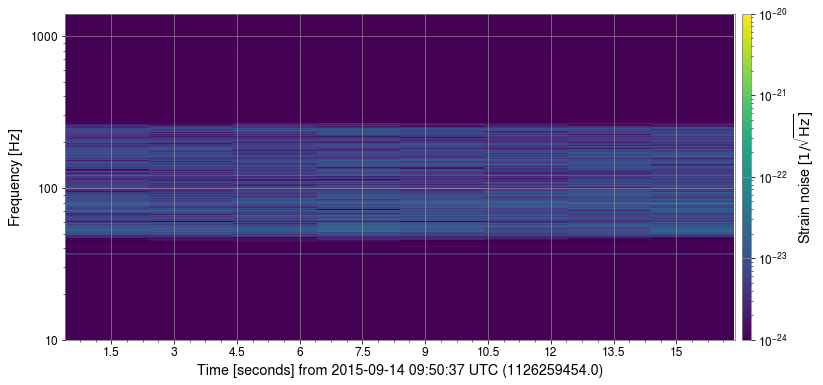

In [58]:
specgramH = data_filteredH.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgramH.plot()


ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.set_xlim(ev_gps-8, ev_gps+8)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
#plot  # refresh

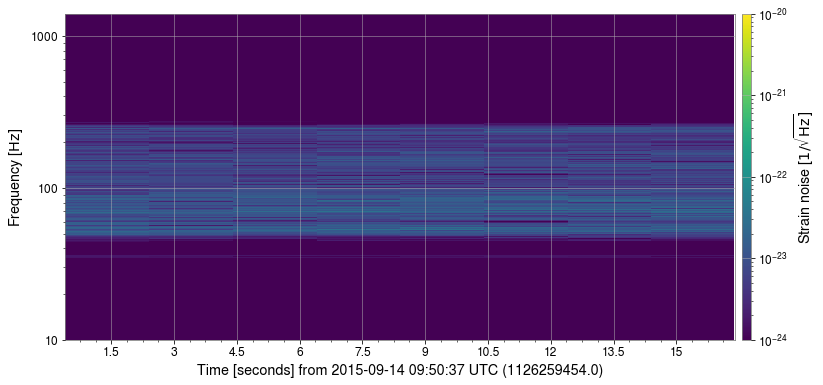

In [59]:
#now, the spectrograms
specgramL = data_filteredL.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgramL.plot()

#We need to adjust the scale...

ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.set_xlim(ev_gps-8, ev_gps+8)

ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
#plot  # refresh